# Question

### To find the top 11 actor who has starred most of the times in the top 250 movies according to IMDB and to check if the number one  is a supporting actor like (Jack Nicholson) or lead role actor like(Leonardo DiCaprio)


# Modules used

### I have used requests module to get the data from the url, used BeautifulSoup to format data and collections to query the data.

In [4]:
import requests

from bs4 import BeautifulSoup

from collections import Counter

# Platform Used

### For the data gathering I have used the imdb web page which gave the list of top 250 movies 
### "https://www.imdb.com/chart/top?sort=rk,asc&mode=simple&page=1"

In [5]:
file= requests.get("https://www.imdb.com/chart/top?sort=rk,asc&mode=simple&page=1",headers={'User-Agent':'Mozilla/5.0'})

soup = BeautifulSoup(file.text,'html5lib')

### In the below code I am getting all the td which had class titlecolumn these are the movie data in the table.

In [6]:

ulval=soup.find_all('td',{'class':'titleColumn'})

TopMoviesList=[]



### In the below code I am getting the details which are in anchor tag which has the director and two lead actors in a coma seperated list. I am splitting this data and forming a dictionary.

In [7]:
for val in ulval:
    
    #print(val.find('a').get('title'))
    cast =  val.find('a').get('title')
    castlist = cast.split (", ")
    TopMoviesList.append({'director':castlist[0],'actor1':castlist[1],'actor2':castlist[2]})
   # print('--------------------------------------------------')

actorlist=[]
    
for movie in TopMoviesList:
    actorlist.append(movie['actor1'])
    actorlist.append(movie['actor2'])

top11=Counter(actorlist)    
    
topActorCount=[]    
for a in Counter(actorlist).most_common(11):
    topActorCount.append({'name':a[0],'no_of_movies':a[1]})
    




### In the below code I am using the matplotlib library to create a bargraph for top 11 actors based on number of movies. Here x axis has actors and y axis is number of movies.

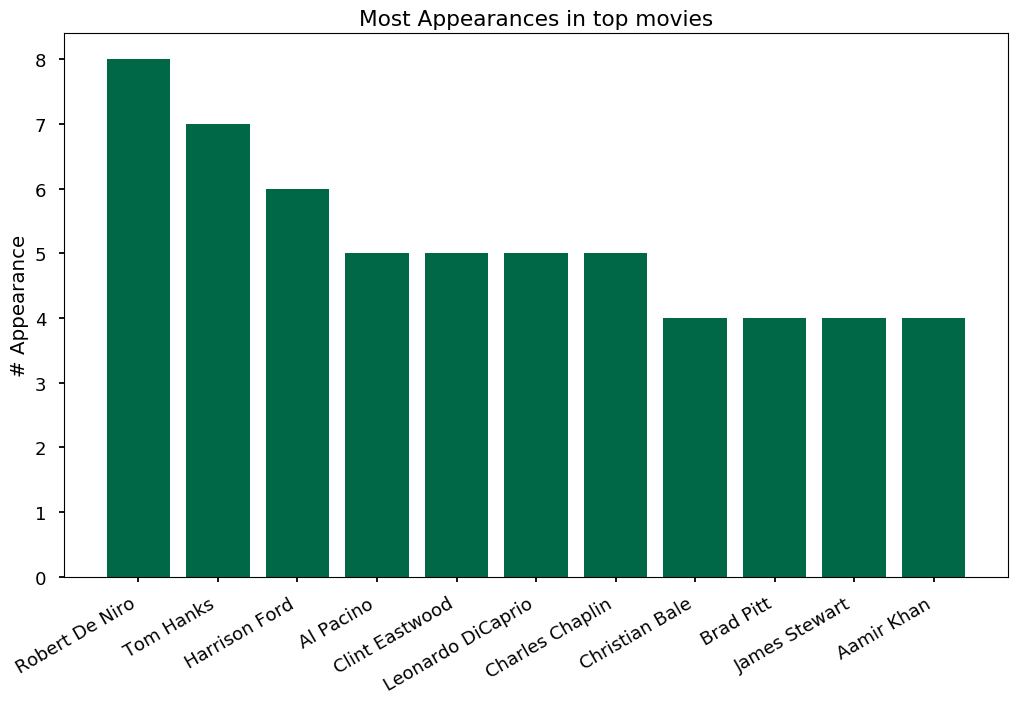

<Figure size 1040x715 with 0 Axes>

In [8]:

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import matplotlib.style as style


style.use('default')
style.use('seaborn-talk')
NUM_VALUES = 11
heights = list(top11.values())
heights.sort(reverse=True)
plt.bar(range(NUM_VALUES), heights[:NUM_VALUES],color='#006747')
plt.title('Most Appearances in top movies')
plt.ylabel('# Appearance')
keys = list(top11.keys())
keys.sort(reverse=True, key=lambda x: top11[x])
plt.xticks(range(NUM_VALUES), keys[:NUM_VALUES],rotation=30, horizontalalignment='right')
plt.tight_layout()
plt.show()
plt.savefig('myplot.png')


